# CEK DIMENASI DATA + TIPE DATA

In [1]:
import pandas as pd
import csv

In [2]:
df = pd.read_csv("laptop_prices.csv")

In [3]:
df.shape

(1275, 23)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [8]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

# STATISTIK DASAR

In [9]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


# Outlier Detection

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

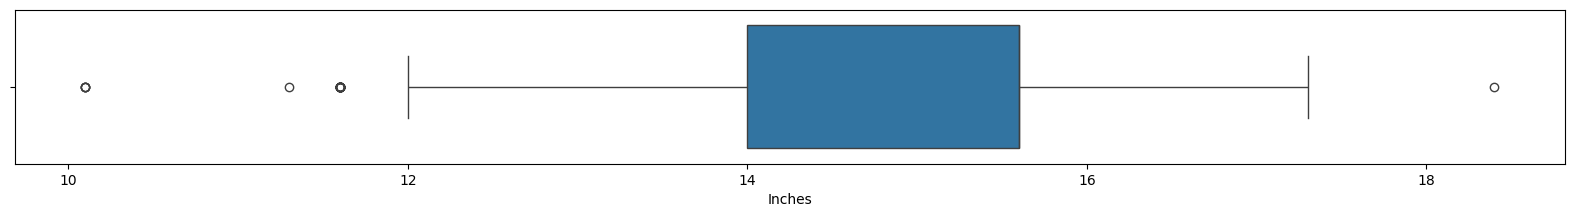

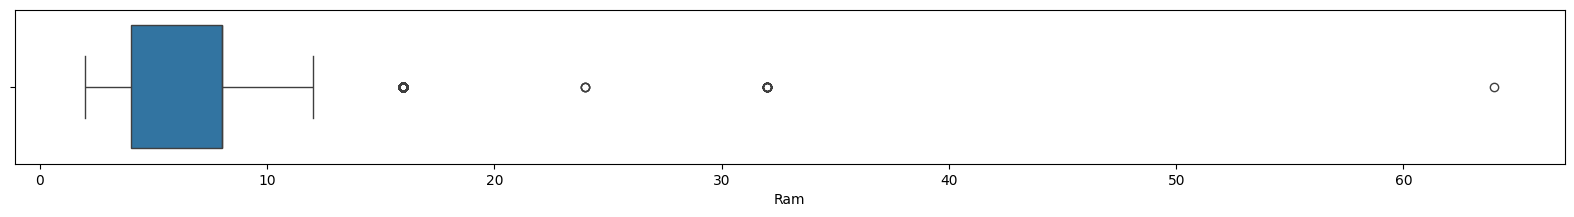

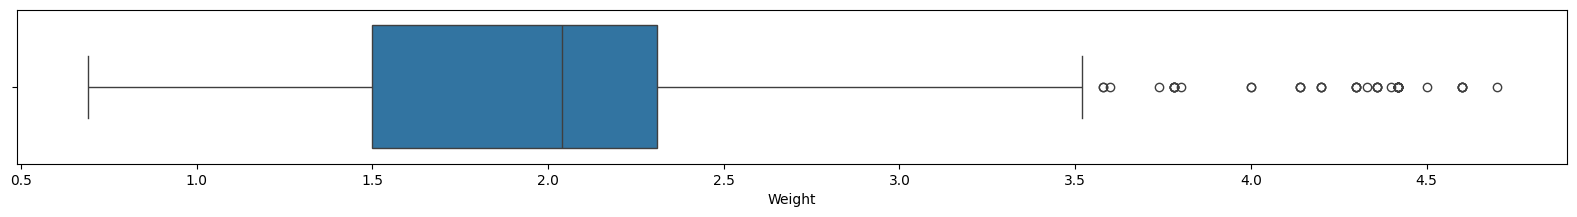

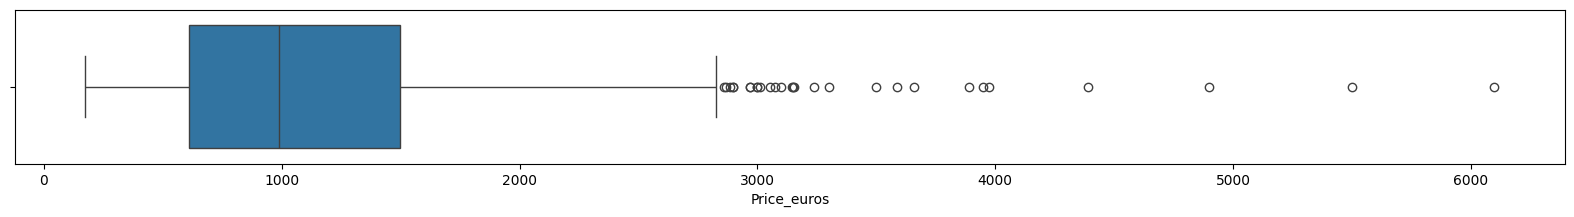

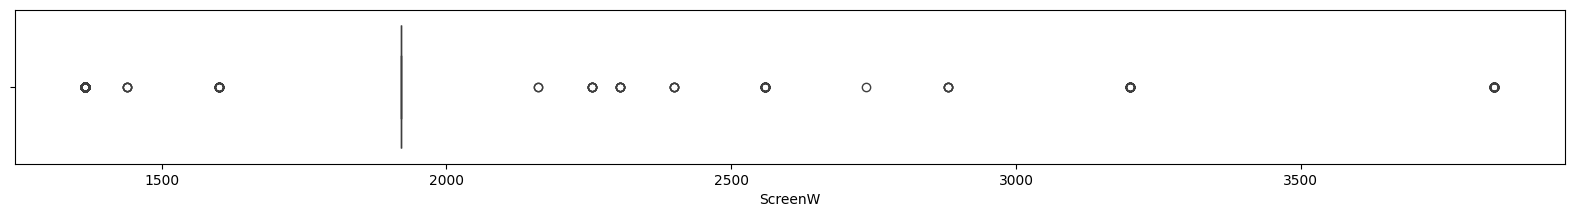

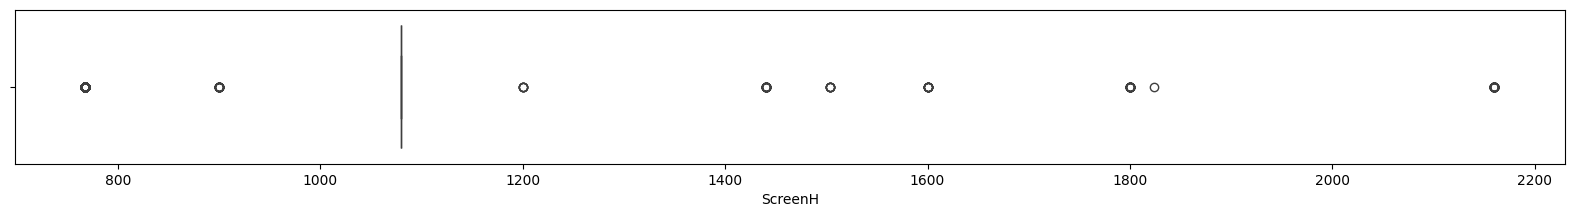

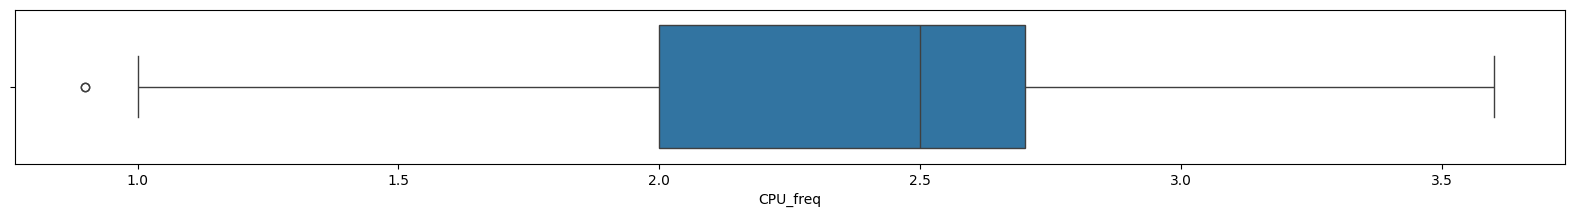

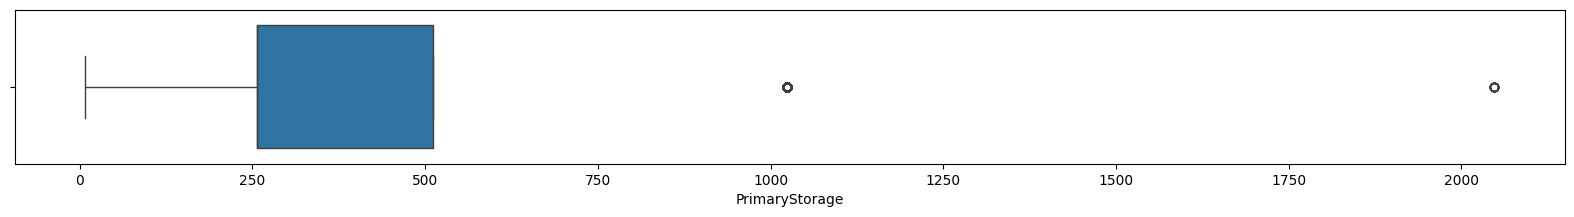

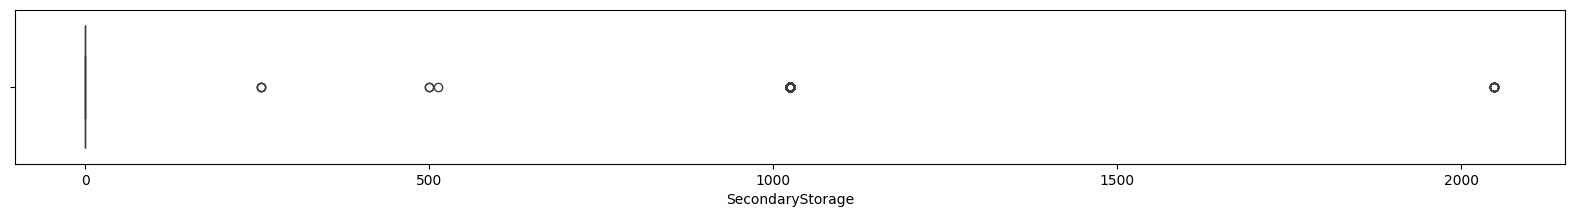

In [12]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [43]:
# Memilih kolom dengan tipe data selain object
df.select_dtypes(exclude="object").head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


In [44]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Inches                1.60
Ram                   4.00
Weight                0.81
Price_euros         887.50
ScreenW               0.00
ScreenH               0.00
CPU_freq              0.70
PrimaryStorage      256.00
SecondaryStorage      0.00
dtype: float64

In [45]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Inches                18.000
Ram                   14.000
Weight                 3.525
Price_euros         2827.750
ScreenW             1920.000
ScreenH             1080.000
CPU_freq               3.750
PrimaryStorage       896.000
SecondaryStorage       0.000
dtype: float64

In [46]:
df_noid_outlier_clean = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

In [47]:
df_noid_outlier_clean.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
11,HP,250 G6,Notebook,15.6,4,No OS,1.86,344.99,Full HD,1920,...,No,Intel,2.0,Core i3 6006U,500,0,HDD,No,Intel,HD Graphics 520
13,Dell,Inspiron 3567,Notebook,15.6,4,Windows 10,2.20,498.90,Full HD,1920,...,No,Intel,2.0,Core i3 6006U,256,0,SSD,No,AMD,Radeon R5 M430
16,Dell,Inspiron 3567,Notebook,15.6,8,Windows 10,2.20,745.00,Full HD,1920,...,No,Intel,2.7,Core i7 7500U,256,0,SSD,No,AMD,Radeon R5 M430


In [48]:
# Melihat ukuran baris dan kolom setelah dipangkas
df_noid_outlier_clean.shape

(438, 23)

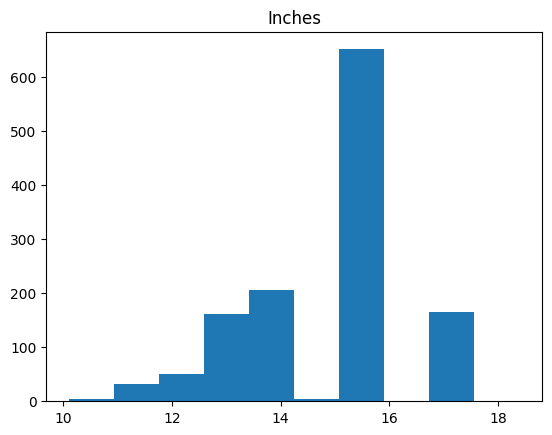

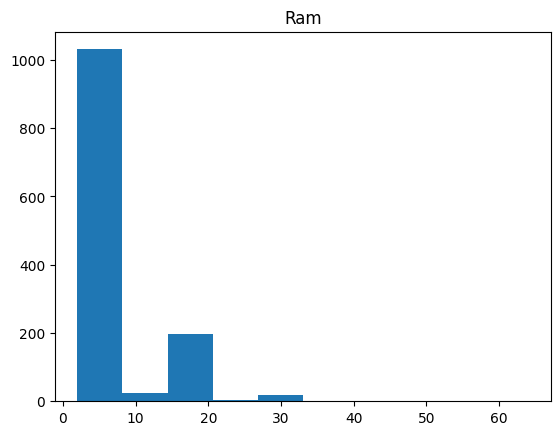

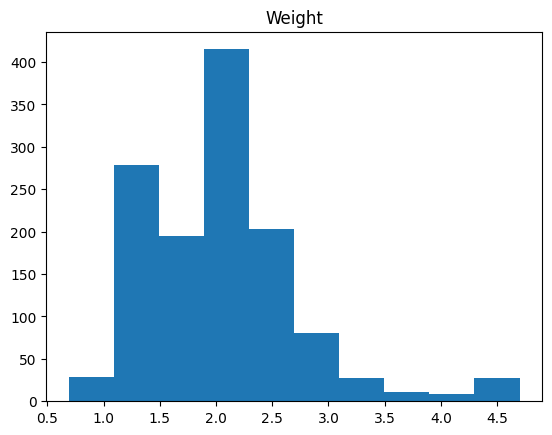

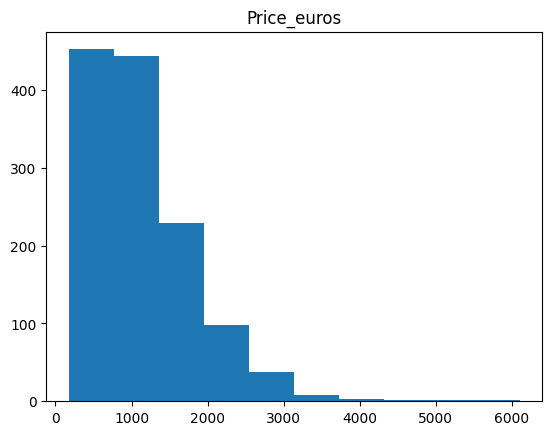

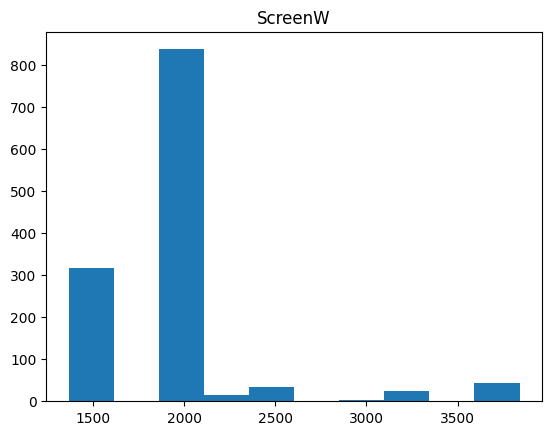

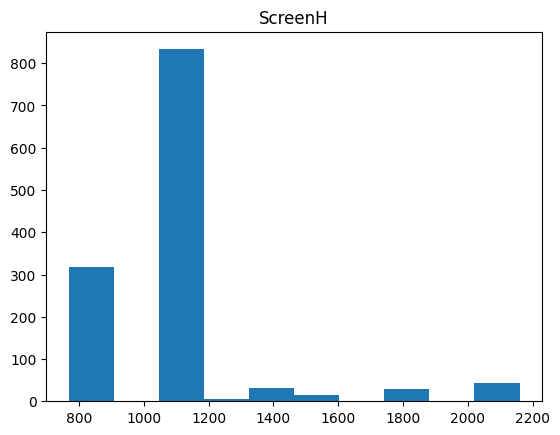

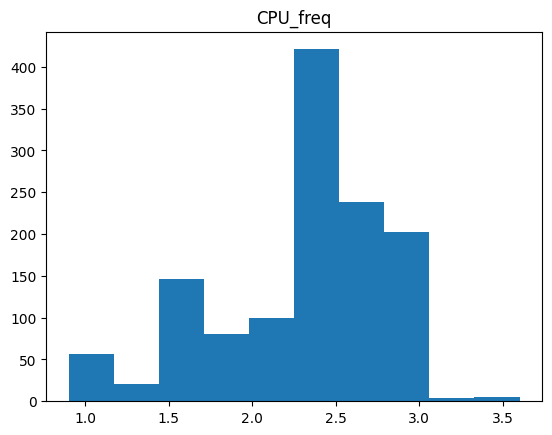

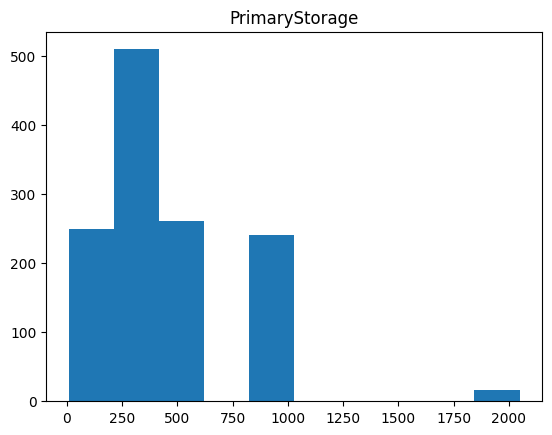

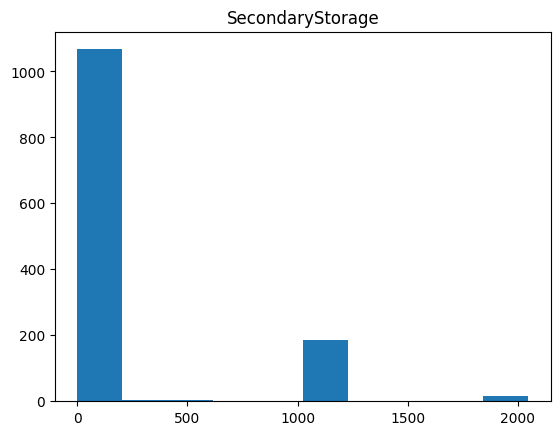

In [52]:
# Melihat Persebaran Data - Histogram
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

# Check Missing Value

In [14]:
# Import Library
import pandas as pd

In [15]:
# Memuat data dengan format csv
df = pd.read_csv("laptop_prices.csv")

In [17]:
df['Weight'].max()

4.7

In [18]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [53]:
# Menghitung nilai data yang kosong
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

# Distribusi Harga Laptop

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('laptop_prices.csv')

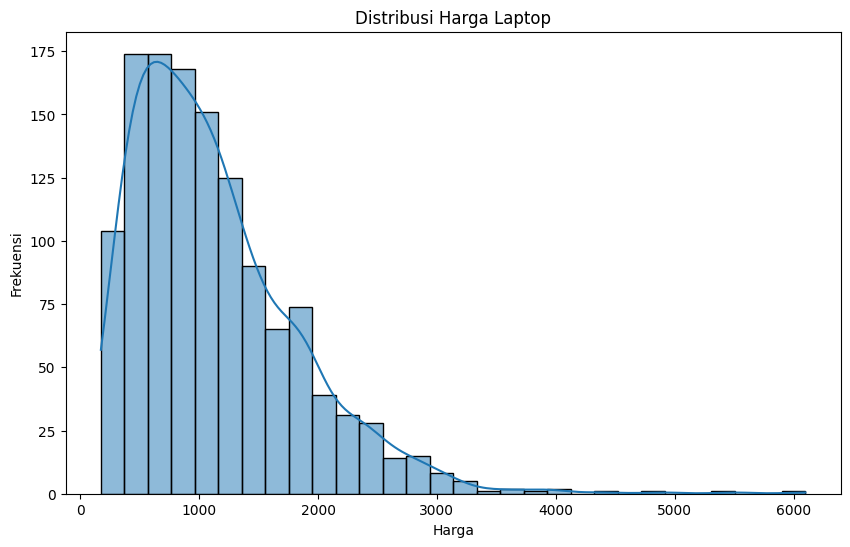

In [54]:
# Membuat histogram untuk distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_euros'], bins=30, kde=True)
plt.title('Distribusi Harga Laptop')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

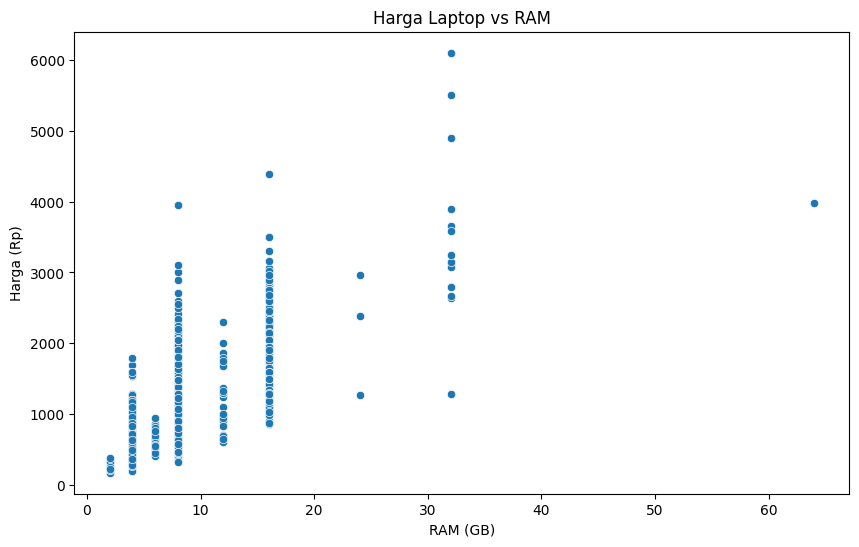

In [55]:
# Scatter plot untuk harga vs RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=data)
plt.title('Harga Laptop vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Harga (Rp)')
plt.show()

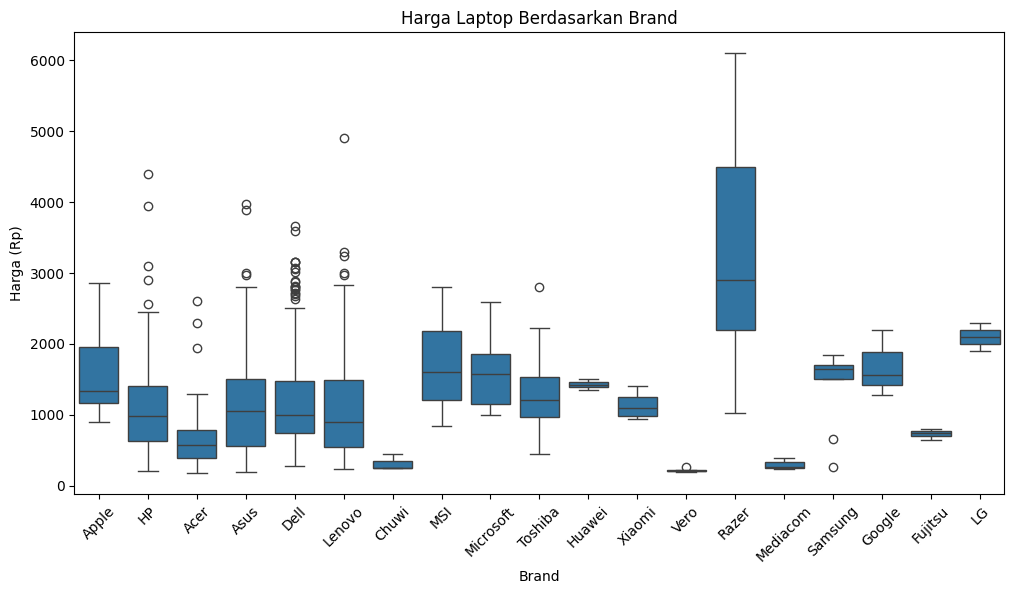

In [56]:
# Boxplot untuk harga berdasarkan brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=data)
plt.xticks(rotation=45)
plt.title('Harga Laptop Berdasarkan Brand')
plt.xlabel('Brand')
plt.ylabel('Harga (Rp)')
plt.show()

# Modeling

In [57]:
#  Impor Pustaka yang Dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('laptop_prices.csv')

In [59]:
#  Memilih Fitur yang Ingin Digunakan untuk Prediksi
# Misalnya: RAM, Memory, Screen Size untuk memprediksi Price
X = data[['Ram', 'PrimaryStorage', 'Inches']]  # Ganti dengan kolom yang sesuai
y = data['Price_euros']  # Targetnya adalah harga

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Membuat dan Melatih Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

# Evaluasi Model

In [63]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 189131.41614717542
R-squared: 0.6189473093085397


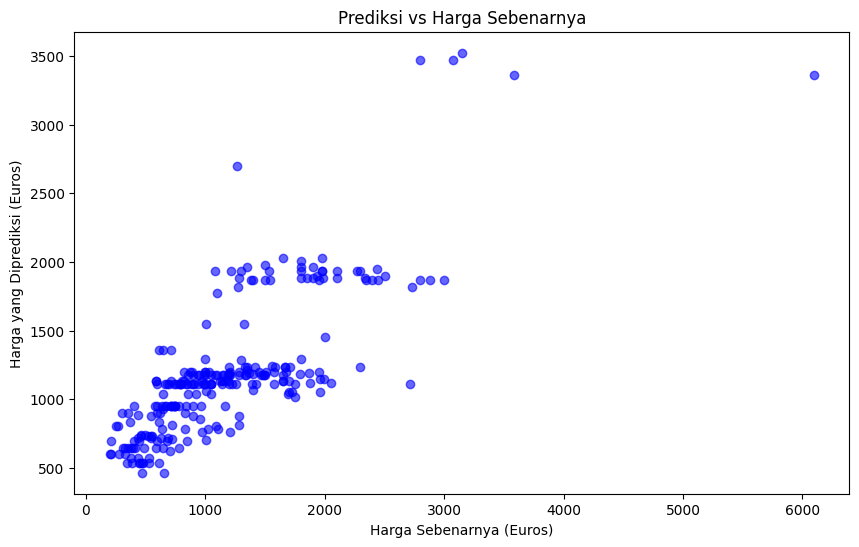

In [64]:
# Visualisasi Hasil Prediksi vs Nilai Asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel("Harga Sebenarnya (Euros)")
plt.ylabel("Harga yang Diprediksi (Euros)")
plt.title("Prediksi vs Harga Sebenarnya")
plt.show()